In [1]:
import numpy as np
import pandas as pd
onlyO = True

Extract the Data from file "HISTORY"

In [2]:
file = open("HISTORY", "r"); file.readline() # skip name line
line = file.readline() # read second line, contain the number of atoms
a,b,c = [float(comp) for comp in line.split() if comp.replace('.', '', 1).isdigit()] #a: trejectory, b: boundary, c: number of atoms
# read and convert the components to float
#print(stepc[1])
L = np.zeros((3))
if onlyO:
    dat = np.zeros((int((c + 1)/3),int(a + 1),3)) #[number of atoms, number of (r,v,a), 3]
dats = []
while True:
    line = file.readline()
    #print(line)
    if not line:
        break
    stepc = [float(comp) for comp in line.split() if comp.replace('.', '', 1).isdigit()]
    
    L[0] = (file.readline().split()[0])
    L[1] = (file.readline().split()[1])
    L[2] = (file.readline().split()[2])
    #print(L)
    ni = -1
    for n in range(int(stepc[1])):
        line = file.readline().strip()  # Strip leading/trailing whitespace
        if line.startswith("OW"):
            ni += 1
            for i in range(int(a)+1):
                line = file.readline().strip()
                dat[ni,i,:] = np.fromstring(line, sep=' ')
        else:
            for i in range(int(a)+1):
                file.readline()
    #print(dat[0,0,:])
    dats.append(dat.copy())
print(dats[-1][0,0,:]) #dats[step][atom][r,v,a][x,y,z]


[-8.041   9.6182  9.9577]


Data stored in dats in the format [time step][index of atom][r,v,a depend on the traj][x,y,z components].
Calculating the distant between two atoms by using the outer substract:
\begin{align}
x_{12} &= x_{1} - x_{2}\\
y_{12} &= y_{1} - y_{2}\\
z_{12} &= z_{1} - z_{2}\\
r_{12}^2 &= x_{12}^2 + y_{12}^2 + z_{12}^2
\end{align}

In [3]:
r12 = np.zeros((len(dats), len(dats[0][:,0,:]), len(dats[0][:,0,:])))
for t in range(len(dats)):
    coords = dats[t][:,0,:]
    #x12 = np.zeros((len(coords), len(coords)))
    #y12 = np.zeros((len(coords), len(coords)))
    #z12 = np.zeros((len(coords), len(coords)))
    #
    #for i in range(len(coords)):
    #    for j in range(len(coords)):
    #        x12[i, j] = coords[i, 0] - coords[j, 0]
    #        y12[i, j] = coords[i, 1] - coords[j, 1]
    #        z12[i, j] = coords[i, 2] - coords[j, 2]
    #
    x12 = np.subtract.outer(coords[:,0], coords[:,0])
    y12 = np.subtract.outer(coords[:,1], coords[:,1])
    z12 = np.subtract.outer(coords[:,2], coords[:,2])
    
    # Minimum image convention
    x12[x12 > L[0]/2.] -= L[0]; x12[x12 < -L[0]/2.] += L[0]
    y12[y12 > L[1]/2.] -= L[1]; y12[y12 < -L[1]/2.] += L[1]
    z12[z12 > L[2]/2.] -= L[2]; z12[z12 < -L[2]/2.] += L[2]
    r12[t] = np.sqrt(x12**2 + y12**2 + z12**2)
    
print(r12[-1,:,:])

[[0.         5.62899762 2.73533005 3.02495331 4.53282985 4.95772405]
 [5.62899762 0.         4.82950582 4.51745244 2.68478605 2.73502197]
 [2.73533005 4.82950582 0.         4.73597677 2.68071509 5.57141403]
 [3.02495331 4.51745244 4.73597677 0.         4.8842187  2.72109141]
 [4.53282985 2.68478605 2.68071509 4.8842187  0.         4.54275677]
 [4.95772405 2.73502197 5.57141403 2.72109141 4.54275677 0.        ]]


500
[array([5.92539617, 2.75532845, 2.71786665, 4.19847583, 4.67505508,
       5.1922006 , 4.23496913, 2.65813264, 2.67419546, 4.12774245,
       2.71103161, 5.2285416 , 3.85110057, 2.69040048, 3.48631072]), array([6.00360111, 2.67422005, 2.69903797, 4.20793649, 5.16209415,
       5.51962456, 4.38377465, 2.97405143, 2.78701621, 4.26658562,
       2.77611207, 5.97018074, 4.0964669 , 2.92559231, 4.31034083]), array([5.4579388 , 2.73644199, 2.67207987, 4.44022953, 5.33405511,
       4.89540516, 3.96793225, 2.70353345, 2.68157022, 4.32097339,
       2.6881644 , 6.09066063, 4.45719142, 2.86227475, 4.80724648]), array([5.1438942 , 2.87073789, 2.85042826, 4.73383048, 5.19356486,
       4.71799874, 4.1612046 , 2.82457545, 2.83058528, 4.874352  ,
       2.84828718, 6.1996466 , 5.38784198, 2.7778738 , 5.32327706]), array([4.56610022, 2.59160824, 2.75459403, 4.37695942, 4.23874005,
       4.17777986, 4.68449527, 2.64445672, 2.74466797, 4.91075172,
       2.7024884 , 5.33610355, 5.8939606 , 2.7609

(array([[6., 0., 1., ..., 0., 1., 0.],
        [5., 1., 0., ..., 1., 2., 0.],
        [6., 0., 0., ..., 1., 1., 0.],
        ...,
        [5., 1., 0., ..., 1., 0., 0.],
        [5., 1., 0., ..., 2., 0., 0.],
        [5., 1., 0., ..., 2., 0., 0.]], shape=(500, 10)),
 array([2.51874153, 2.92958483, 3.34042812, 3.75127141, 4.1621147 ,
        4.57295799, 4.98380128, 5.39464457, 5.80548786, 6.21633115,
        6.62717444]),
 <a list of 500 BarContainer objects>)

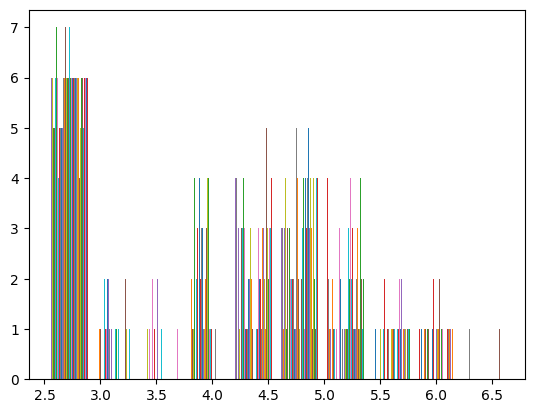

In [ ]:
import matplotlib.pyplot as plt
print(len(r12))
r12off =[]
plt.hist(np.concatenate(r12off), bins=50, density=True, color='blue')
plt.xlabel('Distance (Å)')
plt.ylabel('Density')
plt.title('Density Histogram of Atomic Distances')